In [1]:
from clustering_driver import *

In [ ]:
def search_level_tree(node_list, data_list, T):
    nearest_level_clusters = level_order_search(node_list, T)
    totsum = 0
    for level in nearest_level_clusters:
        minsum = 0
        for cluster_id in level:
            nn = 0
            min_dist = float("inf")
            for i in node_list[cluster_id].data_refs:
                dist = custom_distance(node_list[i].val, T)
                if dist < min_dist:
                    nn = i
                    min_dist = dist
            minsum += min_dist
        totsum += minsum
    return totsum


def search_level_tree_associations(node_list, data_list, input_list):
    """
    Computes matches using tree-based nearest neighbor search.

    Args:
        node_list (list of ClusterTreeNode): List of nodes representing a search tree structure.
        data_list (list of DatumT): List of data points for comparison.
        input_list (list of DatumT): List of input points to find matches for.

    Returns:
        di_match (list of ints): List of indices representing nearest neighbors found in the search tree.
        ds_match (list of floats): List of corresponding distances to nearest neighbors.
    """
    di_match_indices = []
    ds_match_distances = []

    start_time = time.perf_counter()
    totsums = []
    # For each input point in the input list
    for input_index, input_point in enumerate(input_list):
        # Search the tree to find nearest neighbor and distance
        totsum = search_level_tree(node_list, data_list, input_point)

    end_time = time.perf_counter()
    time_to_locate = end_time - start_time
    print(time_to_locate)
    # logger.info("{}".format(time_to_locate))
    # print("Time taken for tree-based search:", time_to_locate)

    return

In [4]:
import numpy as np
s = np.load("../../ingest-pipeline/src/serialized_images_0.npy")
s.shape


(210, 128, 128)

In [2]:
from collections import deque
from clustering_driver import *

n, d, p = tree_loader("im310plusplus_tree_hierarchy.json")
q = deque()

q.append(0)
q.append(None)
level = 0
lr = [f"level,width"]
labels = [f"\"0\""]
parents = [f"\"\""]
node_count = 0
while len(q) and q[0] != None:
    # q.append(None)
    while q[0] != None:
        node_count += 1
        lr.append(f"{level},{len(q)}")
        nid = q.popleft()
        node = n[nid]
        # print(lr[-1])
        if node.children != None and len(node.children):
            # print(node.children)
            for c in node.children:
                # labels.append(f"\"{str(c)}\"")
                # parents.append(f"\"{str(nid)}\"")
                # lr.append(f"{nid},{c}")
                q.append(c)
        # elif node.children == None:
        #     for d in node.data_refs:
        #         lr.append(f"{nid},{d}")
    q.popleft()
    if len(q):
        q.append(None)
    print(node_count)
    level += 1

f = open("stats.csv", "w")
f.write(",\n".join(lr))
f.close()
# f.write("labels=[")
# f.write(",".join(labels))
# f.write("],")
# f.write("\n")
# f.write("parents=[")
# f.write(",".join(parents))
# f.write("],")
# f.write("\n")
# f.write("values=[")
# f.write(",".join([str(2) for i in range(len(labels))]))
# f.write("]")
# f.close()

1
3
7
15
31
63
121
211
295
341
365


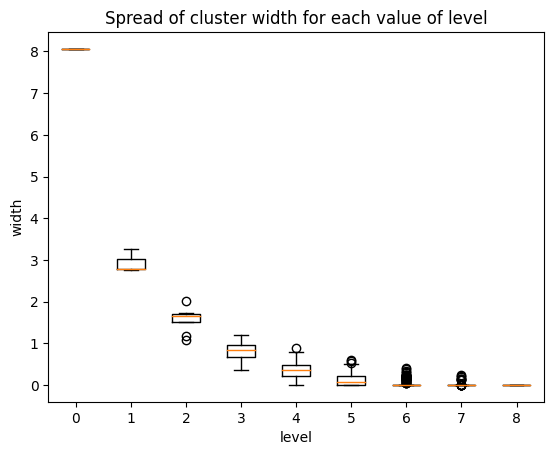

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("stats.csv")

# Group the data by unique values in col1 and collect the corresponding values in col2
grouped_data = [
    df.loc[df["level"] == value, "width"].values for value in df["level"].unique()
]

# Plotting a box plot
plt.boxplot(grouped_data, labels=df["level"].unique())
plt.title("Spread of cluster width for each value of level")
plt.xlabel("level")
plt.ylabel("width")
plt.show()

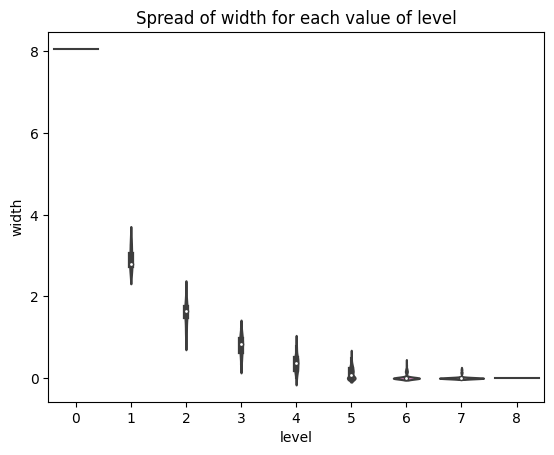

In [19]:
import seaborn as sns

# Use seaborn for a violin plot
# f = open("w")
sns.violinplot(x="level", y="width", data=df)
plt.title("Spread of width for each value of level")
plt.xlabel("level")
plt.ylabel("width")
plt.show()

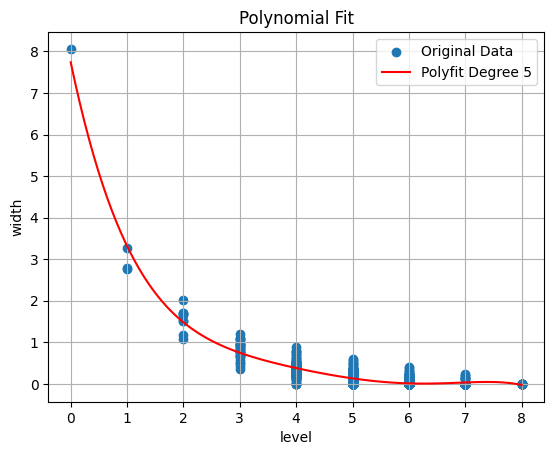

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Read the CSV file into a DataFrame
# df = pd.read_csv('data.csv')

# Extract the values from the two columns
col1 = df["level"]
col2 = df["width"]

# Fit a polynomial of degree N to the data
degree = 5  # Adjust the degree as needed
coefficients = np.polyfit(col1, col2, degree)

# Create a polynomial function using the coefficients
poly_function = np.poly1d(coefficients)

# Generate x values for the fitted curve
x_fit = np.linspace(min(col1), max(col1), 100)

# Compute the corresponding y values using the polynomial function
y_fit = poly_function(x_fit)

# Plotting the original data
plt.scatter(col1, col2, label="Original Data")

# Plotting the fitted polynomial
plt.plot(x_fit, y_fit, label=f"Polyfit Degree {degree}", color="red")

plt.title("Polynomial Fit")
plt.xlabel("level")
plt.ylabel("width")
plt.legend()
plt.grid(True)
plt.show()